### 02 车牌处理，提取车牌中各个字符

In [1]:
# 导入所需模块
import cv2
from matplotlib import pyplot as plt

# 显示图片
def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey()
    cv2.destroyAllWindows()

# plt显示彩色图片
def plt_show0(img):
    b,g,r = cv2.split(img)
    img = cv2.merge([r, g, b])
    plt.imshow(img)
    plt.show()
    
# plt显示灰度图片
def plt_show(img):
    plt.imshow(img,cmap='gray')
    plt.show()

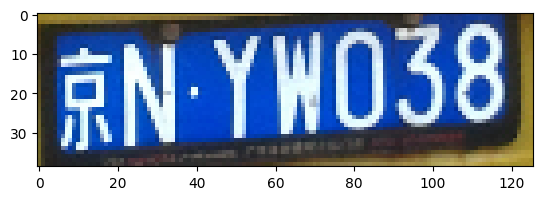

In [2]:
# 加载图片
rawImage = cv2.imread("./car_license/test4.png")
plt_show0(rawImage)

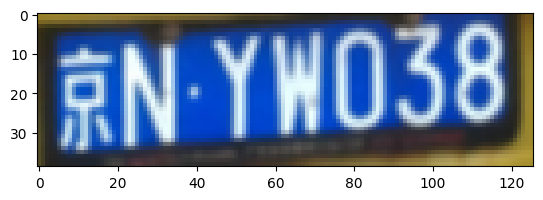

In [3]:
# 高斯去噪
image = cv2.GaussianBlur(rawImage, (3, 3), 0)
# 预览效果
plt_show0(image)

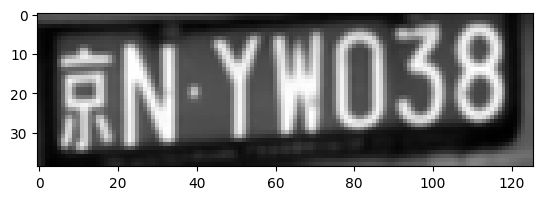

In [4]:
# 灰度处理
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt_show(gray_image)

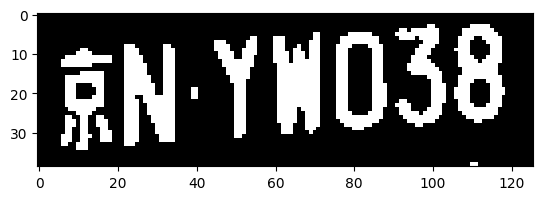

In [5]:
# 自适应阈值处理
ret, image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_OTSU)
plt_show(image)

In [6]:
# 计算二值图像黑白点的个数，处理绿牌照问题，让车牌号码始终为白色
area_white = 0
area_black = 0
height, width = image.shape
print(image.shape)
for i in range(height):
    for j in range(width):
        if image[i, j] == 255:
            area_white += 1
        else:
            area_black += 1
if area_white>area_black:
    ret, image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
    plt_show(image)

(39, 126)


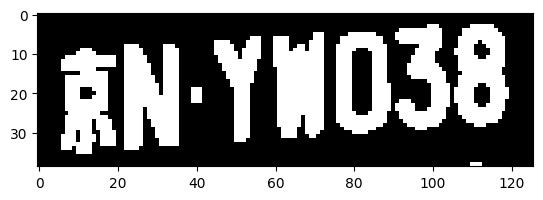

In [7]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
# kernelX = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 1))
# kernelY = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 5))
# image = cv2.erode(image, kernelX)
# image = cv2.erode(image, kernelY)
image = cv2.dilate(image, kernel)
plt_show(image)
# 闭运算,是白色部分练成整体
# kernelX = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
# print(kernelX)
# image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernelX,iterations = 2)
# plt_show(image)

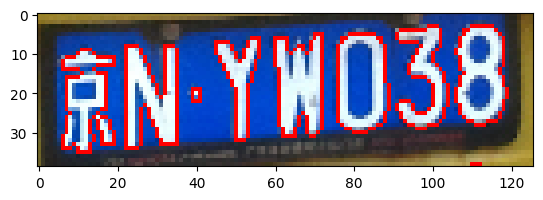

In [8]:
# 轮廓检测
# cv2.RETR_EXTERNAL表示只检测外轮廓
# cv2.CHAIN_APPROX_SIMPLE压缩水平方向，垂直方向，对角线方向的元素，只保留该方向的终点坐标，例如一个矩形轮廓只需4个点来保存轮廓信息
contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# 绘制轮廓
image1 = rawImage.copy()
cv2.drawContours(image1, contours, -1, (0, 0, 255), 1)
plt_show0(image1)

[[6, 9, 14, 27], [22, 8, 14, 27], [39, 19, 3, 4], [45, 6, 12, 27], [60, 5, 13, 27], [76, 5, 14, 26], [91, 3, 14, 27], [106, 3, 14, 26], [110, 38, 3, 1]]


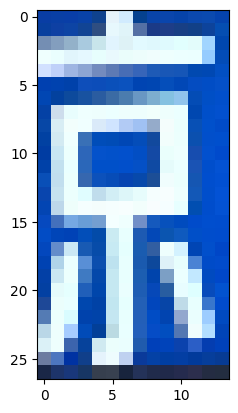

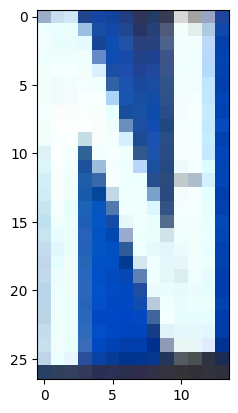

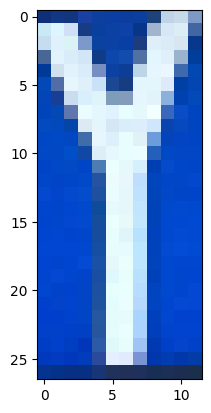

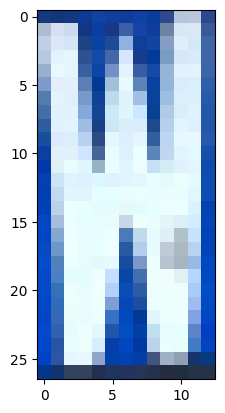

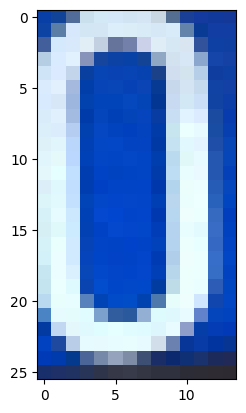

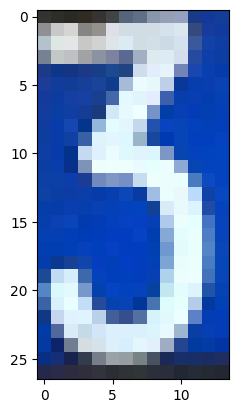

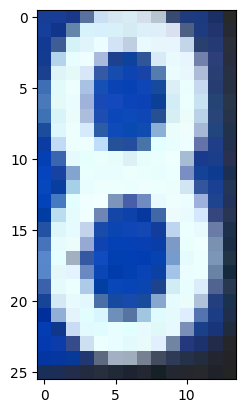

In [9]:
# 筛选出各个字符的位置的轮廓
words = []
for item in contours:
    # cv2.boundingRect用一个最小的矩形，把找到的形状包起来
    word = []
    rect = cv2.boundingRect(item)
    x = rect[0]
    y = rect[1]
    weight = rect[2]
    height = rect[3]
    word.append(x)
    word.append(y)
    word.append(weight)
    word.append(height)
    words.append(word)
    
words = sorted(words,key=lambda s:s[0],reverse=False)
    
print(words)

i = 0
for word in words:
    if (word[3] > (word[2] * 1.8)) and (word[3] < (word[2] * 3.5)):
        i = i+1
        image = rawImage[word[1]:word[1] + word[3], word[0]:word[0] + word[2]]
        plt_show0(image)
        cv2.imwrite('./words/test2_'+str(i)+'.png', image)
